In [1]:
import pandas as pd

In [3]:
df_rat = pd.read_csv(r"C:\Users\GOLLA RAVI TEJA\Downloads\movie_data\ratings.csv")

In [4]:
df_tags = pd.read_csv(r"C:\Users\GOLLA RAVI TEJA\Downloads\movie_data\tags.csv")

In [5]:
df_links = pd.read_csv(r"C:\Users\GOLLA RAVI TEJA\Downloads\movie_data\links.csv")

In [7]:
df_mov = pd.read_csv(r"C:\Users\GOLLA RAVI TEJA\Downloads\movie_data\movies.csv")

In [ ]:
## Download the data from the above link. How many ".csv" files are available in the dataset?
# -> are: 4

In [8]:
# What is the shape of "movies.csv"?
df_mov.shape

(9742, 3)

In [9]:
# What is the shape of "ratings.csv"?
df_rat.shape

(100836, 4)

In [11]:
# How many unique "userId" are available in "ratings.csv"?
df_rat.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
df_rat['userId'].nunique()

610

In [35]:
df_mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [36]:
df_merge = pd.merge(df_rat,df_mov, on='movieId')

In [37]:
df_merge

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [43]:
m = df_merge['title'].value_counts()[0]

In [45]:
m.max()

329

In [46]:
### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [47]:
df_m_t = pd.merge(df_mov,df_tags, on='movieId')

In [50]:
df_m_t[df_m_t['title']=="Matrix, The (1999)"]

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [55]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
df_merge[df_merge['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

In [68]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Density'>

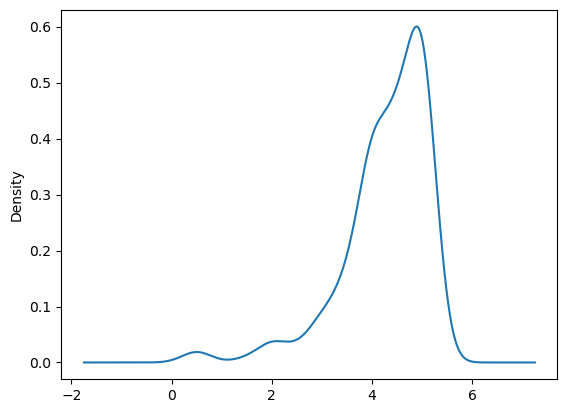

In [69]:
df_merge[df_merge['title']=='Fight Club (1999)']['rating'].plot(kind='kde')

In [80]:
# Which movie has recieved maximum number of user ratings?
df_merge[['title','rating']]

,title,rating
0,Toy Story (1995),4.0
1,Toy Story (1995),4.0
2,Toy Story (1995),4.5
3,Toy Story (1995),2.5
4,Toy Story (1995),4.5
...,...,...
100831,Bloodmoon (1997),2.5
100832,Sympathy for the Underdog (1971),4.5
100833,Hazard (2005),3.0
100834,Blair Witch (2016),3.5


In [105]:
mo_ra = df_merge.groupby('movieId')['rating'].agg(['count','mean'])

In [111]:
user_rat50 = mo_ra[mo_ra['count']>50]

In [112]:
user_rat50

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
6,102,3.946078
7,54,3.185185
...,...,...
106782,54,3.916667
109374,52,3.778846
109487,73,3.993151


In [115]:
# Which movie is the most popular based on average user ratings?
mov = pd.merge(df_mov,user_rat50, on='movieId')


In [120]:
mov.loc[mov['mean'].idxmax()]

movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 53, dtype: object

In [122]:
mov

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [123]:
# Select all the correct options which comes under top 5 popular movies based on number of user ratings.
mov.sort_values(by='count', ascending=False).head(5)

,movieId,title,genres,count,mean
61,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
49,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
99,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [ ]:
# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [161]:
d = df_merge.groupby('movieId')['rating'].agg(['mean','count'])

In [162]:
d

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [164]:
df_m = pd.merge(df_mov, d, on='movieId')

In [170]:
scifi_mov = df_m[df_m['genres']=='Sci-Fi']

In [171]:
scifi_mov

,movieId,title,genres,mean,count
1718,2311,2010: The Year We Make Contact (1984),Sci-Fi,3.588235,17
1901,2526,Meteor (1979),Sci-Fi,1.833333,3
1999,2661,It Came from Outer Space (1953),Sci-Fi,3.000000,1
2002,2665,Earth vs. the Flying Saucers (1956),Sci-Fi,1.000000,1
2025,2698,Zone 39 (1997),Sci-Fi,2.000000,1
2504,3354,Mission to Mars (2000),Sci-Fi,2.690476,21
3116,4198,Battle Beyond the Stars (1980),Sci-Fi,3.000000,1
3517,4813,When Worlds Collide (1951),Sci-Fi,5.000000,1
3595,4942,"Angry Red Planet, The (1959)",Sci-Fi,4.500000,1
3888,5468,20 Million Miles to Earth (1957),Sci-Fi,5.000000,1


In [177]:
scifi_mov.sort_values(by='count', ascending=False).iloc[2]

movieId                      176371
title      Blade Runner 2049 (2017)
genres                       Sci-Fi
mean                       3.805556
count                            18
Name: 9586, dtype: object

In [178]:
user_rat50

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
6,102,3.946078
7,54,3.185185
...,...,...
106782,54,3.916667
109374,52,3.778846
109487,73,3.993151


In [181]:
c = pd.merge(user_rat50,mov, on='movieId')

In [186]:
df_mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [187]:
df_merge

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [191]:
df_merge.groupby('movieId')['rating'].agg(['max'])

,max
movieId,
1,5.0
2,5.0
3,5.0
4,3.0
5,5.0
...,...
193581,4.0
193583,3.5
193585,3.5


In [192]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [199]:
max_rat = df_rat.loc[df_rat['rating'].idxmax()]

In [200]:
max_rat['movieId']

47.0

In [201]:
scifi_mov

,movieId,title,genres,mean,count
1718,2311,2010: The Year We Make Contact (1984),Sci-Fi,3.588235,17
1901,2526,Meteor (1979),Sci-Fi,1.833333,3
1999,2661,It Came from Outer Space (1953),Sci-Fi,3.000000,1
2002,2665,Earth vs. the Flying Saucers (1956),Sci-Fi,1.000000,1
2025,2698,Zone 39 (1997),Sci-Fi,2.000000,1
2504,3354,Mission to Mars (2000),Sci-Fi,2.690476,21
3116,4198,Battle Beyond the Stars (1980),Sci-Fi,3.000000,1
3517,4813,When Worlds Collide (1951),Sci-Fi,5.000000,1
3595,4942,"Angry Red Planet, The (1959)",Sci-Fi,4.500000,1
3888,5468,20 Million Miles to Earth (1957),Sci-Fi,5.000000,1


In [206]:
scf = df_merge[df_merge['genres']=='Sci-Fi']

In [210]:
scf.loc[scf['rating'].idxmax()]

userId                    3
movieId                5919
rating                  5.0
timestamp        1306463825
title        Android (1982)
genres               Sci-Fi
Name: 18814, dtype: object